In [1]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')
import random
import csv
from collections import defaultdict
from math import e
from math import pi
import requests
import re

In [57]:
#loading features of the pigeons(ground) dataset
feature1= pd.read_csv('Pigeons_4927_960_540_600f_DataH10.csv', header=None)
feature2= pd.read_csv('Pigeons_4927_960_540_600f_DataHOG.csv', header=None)
feature3= pd.read_csv('Pigeons_4927_960_540_600f_DataLBP.csv', header=None)
feature4= pd.read_csv('Pigeons_4927_960_540_600f_DataRGB.csv', header= None)

In [3]:
feature1.describe()

,0,1,2,3,4,5,6,7,8,9
count,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000
mean,0.180446,0.004750,0.000058,0.000034,0.000041,0.003570,0.472461,0.203759,0.065383,0.069496
std,0.144389,0.007173,0.000230,0.000190,0.000186,0.005199,0.217804,0.118793,0.051529,0.046222
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031888,0.004464,0.000000,0.000000
25%,0.057398,0.000319,0.000000,0.000000,0.000000,0.000638,0.296237,0.110013,0.030612,0.039222
50%,0.154337,0.002232,0.000000,0.000000,0.000000,0.001913,0.460459,0.177296,0.047832,0.059311
75%,0.276467,0.006059,0.000000,0.000000,0.000000,0.004464,0.638074,0.275191,0.085778,0.087691
max,0.722577,0.102679,0.003189,0.005102,0.002870,0.082270,0.990115,0.606186,0.387755,0.336416


In [6]:
feature2.describe()

,0,1,2,3,4,5,6,7,8,9,...,431,432,433,434,435,436,437,438,439,440
count,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,...,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000
mean,0.324422,0.221286,0.271571,0.349431,0.449452,0.320283,0.234251,0.188573,0.172929,0.332851,...,0.183751,0.330428,0.207086,0.268249,0.370255,0.456879,0.349288,0.241591,0.181675,0.161549
std,0.139185,0.168711,0.166483,0.165872,0.135031,0.167402,0.163696,0.154938,0.157982,0.142777,...,0.153810,0.119292,0.156212,0.157739,0.150951,0.111184,0.156983,0.152428,0.148417,0.148913
min,0.000000,0.000000,0.000000,0.000000,0.023392,0.000000,0.000000,0.000000,0.000000,0.011174,...,0.000000,0.013318,0.000000,0.000000,0.000000,0.026577,0.000000,0.000000,0.000000,0.000000
25%,0.226647,0.059475,0.120420,0.240717,0.383361,0.183894,0.077031,0.044148,0.028933,0.231314,...,0.043521,0.243625,0.063488,0.122578,0.306927,0.391537,0.255360,0.107612,0.048236,0.031386
50%,0.367674,0.207453,0.309158,0.387061,0.429354,0.367986,0.233331,0.154324,0.129407,0.371019,...,0.150781,0.366162,0.183038,0.298134,0.399838,0.437827,0.386821,0.241954,0.149193,0.117877
75%,0.416727,0.374252,0.403837,0.451915,0.502806,0.432982,0.380152,0.345223,0.322686,0.420372,...,0.342293,0.411222,0.358973,0.397578,0.466591,0.508381,0.452750,0.379045,0.324785,0.285437
max,0.980849,0.704804,0.839409,0.718948,1.000000,0.754100,0.848682,0.742306,0.696398,0.995943,...,0.650967,0.905867,0.694460,0.643472,0.700490,0.974253,0.706053,0.619388,0.605684,0.705667


In [5]:
feature3.describe()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
count,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,...,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000
mean,0.361976,0.032424,0.010835,0.023356,0.002603,0.007260,0.028780,0.000637,0.000058,0.002929,...,0.002590,0.000057,0.000793,0.034432,0.006270,0.002138,0.021676,0.008889,0.025020,0.234244
std,0.047980,0.009074,0.003468,0.006127,0.001321,0.002293,0.006470,0.000562,0.000145,0.001393,...,0.001275,0.000146,0.000637,0.009565,0.002499,0.001192,0.008741,0.003686,0.009574,0.031804
min,0.236607,0.007972,0.001276,0.005740,0.000000,0.001276,0.010842,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.009885,0.000319,0.000000,0.001276,0.001276,0.003508,0.121492
25%,0.326531,0.026148,0.008291,0.018814,0.001594,0.005740,0.024235,0.000319,0.000000,0.001913,...,0.001594,0.000000,0.000319,0.027742,0.004464,0.001276,0.015625,0.006378,0.018814,0.213648
50%,0.360013,0.031250,0.010523,0.022959,0.002551,0.007334,0.028380,0.000638,0.000000,0.002870,...,0.002551,0.000000,0.000638,0.033163,0.006059,0.001913,0.020408,0.008291,0.023597,0.232781
75%,0.395727,0.037309,0.013074,0.027105,0.003508,0.008610,0.032844,0.000957,0.000000,0.003827,...,0.003508,0.000000,0.001276,0.040179,0.007653,0.002870,0.026467,0.010842,0.029337,0.254783
max,0.542730,0.081633,0.025829,0.060268,0.009885,0.016263,0.057398,0.003508,0.001913,0.008610,...,0.008610,0.001276,0.004464,0.077806,0.017857,0.008929,0.066008,0.026786,0.077806,0.356824


In [4]:
feature4.describe()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
count,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,...,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000
mean,0.002045,0.001996,0.002089,0.000738,0.000719,0.000685,0.001972,0.001924,0.002028,0.000812,...,0.001306,0.000521,0.000522,0.000548,0.001387,0.001366,0.001530,0.000521,0.000518,0.000533
std,0.000861,0.000836,0.000775,0.000380,0.000366,0.000336,0.000778,0.000757,0.000707,0.000316,...,0.000414,0.000228,0.000209,0.000194,0.000566,0.000536,0.000517,0.000256,0.000240,0.000219
min,0.000387,0.000370,0.000501,0.000027,0.000027,0.000025,0.000374,0.000357,0.000448,0.000071,...,0.000478,0.000048,0.000039,0.000043,0.000307,0.000302,0.000385,0.000032,0.000028,0.000018
25%,0.001334,0.001314,0.001458,0.000440,0.000437,0.000433,0.001350,0.001328,0.001482,0.000598,...,0.000998,0.000363,0.000386,0.000428,0.000969,0.000966,0.001136,0.000341,0.000357,0.000389
50%,0.001933,0.001880,0.002003,0.000778,0.000744,0.000713,0.001893,0.001845,0.001975,0.000829,...,0.001268,0.000480,0.000496,0.000543,0.001316,0.001322,0.001516,0.000458,0.000464,0.000499
75%,0.002790,0.002725,0.002760,0.001061,0.001028,0.000961,0.002556,0.002482,0.002552,0.001068,...,0.001557,0.000654,0.000642,0.000659,0.001678,0.001676,0.001870,0.000660,0.000632,0.000640
max,0.003727,0.003677,0.003659,0.001433,0.001407,0.001316,0.003716,0.003653,0.003631,0.001421,...,0.003578,0.001550,0.001376,0.001221,0.003559,0.003449,0.003438,0.001327,0.001302,0.001233


Assuming normalization has been done during preprocessing since there is no wild observable difference in magnitude between column values

In [8]:
#load target variable file
pigeons_label= pd.read_csv('Pigeons_4927_960_540_600f_Labels.csv', header=None)

## 1. Implementing a Prior classifier without using a Python library 

In [70]:
class NaiveBayesClassifier:
    
    def __init__(self):
        self.class_priors = None
        self.conditional_probs = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)
        
        # Compute class priors
        self.class_priors = np.zeros(n_classes)
        for i, c in enumerate(self.classes):
            self.class_priors[i] = np.sum(y == c) / n_samples
        
        # Compute conditional probabilities
        self.conditional_probs = {}
        for i in range(n_features):
            feature_values = np.unique(X[:, i])
            for j, c in enumerate(self.classes):
                class_data = X[y == c, :]
                self.conditional_probs[(i, c)] = {}
                for value in feature_values:
                    self.conditional_probs[(i, c)][value] = (np.sum(class_data[:, i] == value) + 1) / (len(class_data) + len(feature_values))
    
    def predict(self, X):
        n_samples = X.shape[0]
        y_pred = np.zeros(n_samples)
        for i in range(n_samples):
            joint_probs = np.zeros(len(self.classes))
            for j, c in enumerate(self.classes):
                # Compute the joint probability of the features and the class
                joint_prob = np.log(self.class_priors[j])
                for k in range(X.shape[1]):
                    if (k, c) in self.conditional_probs:
                        if X[i, k] in self.conditional_probs[(k, c)]:
                            joint_prob += np.log(self.conditional_probs[(k, c)][X[i, k]])
                        else:
                            # Handle unseen feature values by assigning a small probability
                            joint_prob += np.log(1 / (len(self.conditional_probs[(k, c)]) + 1))
                    else:
                        # Handle unseen features by assigning a small probability
                        joint_prob += np.log(1 / (X[:, k].max() + 1))
                joint_probs[j] = joint_prob
            # Assign the class with the highest joint probability as the predicted class
            y_pred[i] = self.classes[np.argmax(joint_probs)]
        return y_pred
    

#This code defines a Naive Bayes classifier(because it makes a new observation to the class with the highest prior probability) without a python library.
#The NaiveBayesClassifier class has three main components: class_priors, conditional_probs, and classes.
#The class_priors attribute stores the prior probability of each class in the training data.
#The conditional_probs attribute stores the conditional probability of each feature value given a class.
#The classes attribute stores the unique classes in the training data.
#The fit method fits the Naive Bayes model to the training data X and class labels y by computing the class priors and conditional probabilities.
#The predict method predicts the class labels for new data X using the fitted model.

In [11]:
#creating a dataset containing target and feature variables
pigeons_dataset= pd.concat([feature1, feature2, feature3, feature4, pigeons_label],axis=1)
pigeons_dataset.shape

(2877, 556)

In [14]:
pigeons_dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,0
0,0.327168,0.000638,0.0,0.0,0.000000,0.003508,0.418367,0.134247,0.046237,0.069834,...,0.000526,0.000571,0.000630,0.001953,0.001907,0.001999,0.000669,0.000683,0.000699,1
1,0.000638,0.000000,0.0,0.0,0.000319,0.001276,0.790179,0.160395,0.016263,0.030931,...,0.000527,0.000502,0.000484,0.001546,0.001414,0.001552,0.000527,0.000516,0.000526,4
2,0.000638,0.000000,0.0,0.0,0.000000,0.003508,0.930166,0.056441,0.004783,0.004464,...,0.000406,0.000447,0.000473,0.000826,0.000851,0.001081,0.000322,0.000354,0.000417,13
3,0.053890,0.000000,0.0,0.0,0.000000,0.002551,0.770408,0.112245,0.026467,0.034439,...,0.000293,0.000305,0.000332,0.000986,0.001022,0.001310,0.000311,0.000349,0.000401,7
4,0.166135,0.022959,0.0,0.0,0.000000,0.002551,0.697704,0.046237,0.025510,0.038903,...,0.000241,0.000256,0.000293,0.000659,0.000705,0.000942,0.000204,0.000221,0.000254,2


In [65]:
#creating training and testing data according to sizes given: 1574 1303
data_train= pigeons_dataset.iloc[:1574, :]   #1574 rows, all columns
data_test=  pigeons_dataset.iloc[:1303, :]   #1303 rows, all columns

In [71]:
#creating training data for features
#converting to numpy as NB without python lirary cannot directly compute both dataframe and numpy array 
x= data_train.iloc[:,:-1].to_numpy()  #iloc selects all rows from the train dataset and all columns except the last column
x.shape

(1574, 555)

In [67]:
#creating testing data for features 
x_test= data_test.iloc[:, :-1].to_numpy()  #iloc selects all rows from the test dataset and all columns except the last column
x_test.shape

(1303, 555)

In [68]:
#creating training data for target variable
y = data_train.iloc[:,-1]      #iloc selects all rows from the train dataset and only the last column
y.shape

(1574,)

In [69]:
#creating testing data for target variable
y_test= data_test.iloc[:, -1].to_numpy()   #iloc selects all rows from the test dataset and only the last column
y_test.shape

(1303,)

In [21]:
#creating naive bayes object
nb =NaiveBayesClassifier()

In [22]:
# Train the classifier on the dataset
nb.fit(x, y)

In [23]:
# Make predictions on the same dataset
y_pred = nb.predict(x_test)

In [24]:
# Compute the accuracy of the classifier
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

Accuracy: 1.0


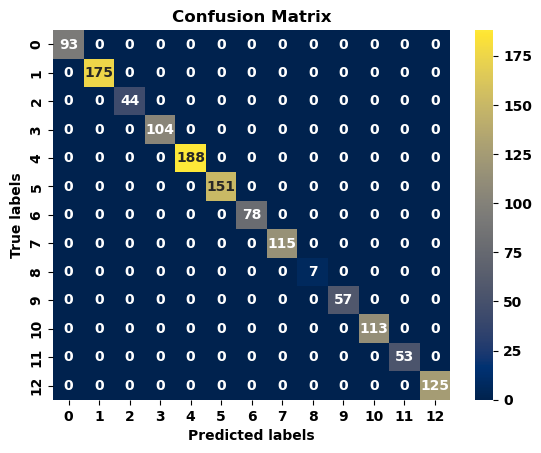

In [58]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='g', cmap= 'cividis')   #annot= writes the number of times it predicts correctly/wrong
                                                        #fmt= converts to whole integer
                                                        #cmap= specifies colours 
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.savefig("nb_pigeons(ground)_confusion_matrix.png")
plt.show()

In [31]:
#concatenating all features 
pigeons_features = pd.concat([feature1, feature2, feature3, feature4],axis=1)

In [32]:
#converting to numpy array because sklearn expects target variable to be in numpy array
pigeons_labels= pigeons_label.to_numpy()

In [33]:
#spliting dataframe into given training and testing sizes: 1574 1303
training=  1574
testing=  1303
test_size = testing / (training + testing)
test_size 

0.4529023288147376

In [34]:
# X is the input features and y is the target variable
X_train, X_test, Y_train, Y_test = train_test_split(pigeons_features, pigeons_labels, test_size=test_size, random_state=42)

# test_size specifies the proportion of the dataset to include in the test split
# random_state ensures that the same random split is generated each time the code is run

In [35]:
print(X_train.shape, Y_train.shape)

(1574, 555) (1574, 1)


In [36]:
print(Y_test.shape, X_test.shape)

(1303, 1) (1303, 555)


## 2. Bagging Classifier

In [37]:
# create the base classifier
base_classifier = DecisionTreeClassifier()

# create the ensemble classifier using bagging
bagging_classifier = BaggingClassifier(base_estimator=base_classifier, 
                                        n_estimators=10, 
                                        random_state=42)

# fit the model on training data
bagging_classifier.fit(X_train, Y_train)

# predict the class labels for test data
bagging_pred = bagging_classifier.predict(X_test)

# evaluate the performance of the classifier
bagging_acc= accuracy_score(Y_test, bagging_pred)
print("Bagging Accuracy: {:.2f}".format(bagging_acc))

Bagging Accuracy: 0.73


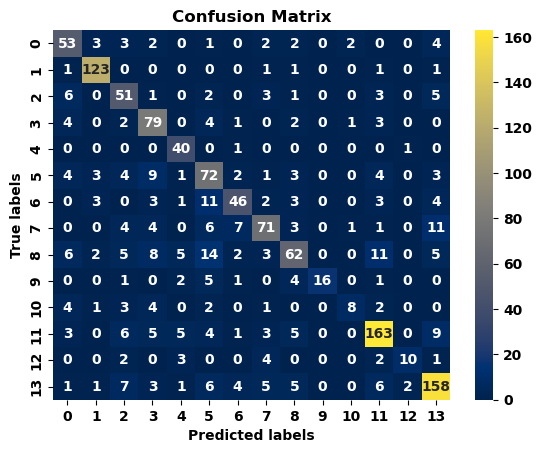

In [38]:
# Create a confusion matrix
cm_bag = confusion_matrix(Y_test, bagging_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm_bag, annot=True, fmt='g', cmap='cividis')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.savefig("bagging_pigeons(ground)_confusion_matrix.png")
plt.show()

## 3. Linear Discriminant Analysis Classifier

In [39]:
# Create an instance of the LDA model
LDA = LinearDiscriminantAnalysis()

# Fit the LDA model to the training data
LDA.fit(X_train, Y_train)

# Predict the target values for the testing data
LDA_pred = LDA.predict(X_test)

#evaluate the performance of the classifier
LDA_acc = accuracy_score(Y_test, LDA_pred)
print("LDA Accuracy: {:.2f}".format(LDA_acc))

LDA Accuracy: 0.81


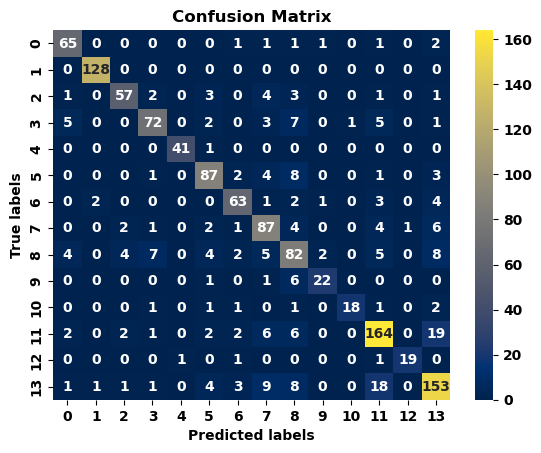

In [40]:
# Create a confusion matrix
cm = confusion_matrix(Y_test, LDA_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='g', cmap='cividis')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

plt.savefig("LDA_pigeons(ground)_confusion_matrix.png")

plt.show()

## 4. KNeighbors Classifier

In [41]:
# Create an instance of the KNN model with k=5
KNN = KNeighborsClassifier(n_neighbors=5)

# Fit the KNN model to the training data
KNN.fit(X_train, Y_train)

# Predict the target values for the testing data
KNN_pred = KNN.predict(X_test)

#evaluate the performance of the classifier
KNN_acc = accuracy_score(Y_test, KNN_pred)
print("KNN Accuracy: {:.2f}".format(KNN_acc))

KNN Accuracy: 0.80


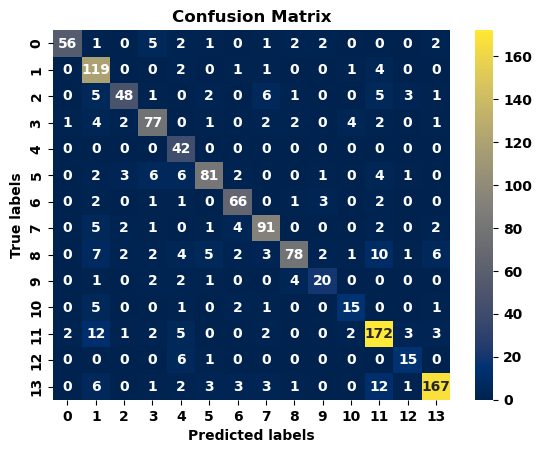

In [42]:
# Create a confusion matrix
cm = confusion_matrix(Y_test, KNN_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='g', cmap='cividis')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

plt.savefig("KNN_pigeons(ground)_confusion_matrix.png")
plt.show()

## 5. Decision Tree Classifier

In [49]:
# Create an instance of the Decision Tree model with max depth of 30
Tree = DecisionTreeClassifier(max_depth=30)

# Fit the Decision Tree model to the training data
Tree.fit(X_train, Y_train)

# Predict the target values for the testing data
Tree_pred = Tree.predict(X_test)

#evaluate the performance of the classifier
Tree_acc = accuracy_score(Y_test, Tree_pred)
print("Decision Tree Accuracy: {:.2f}".format(Tree_acc))

Decision Tree Accuracy: 0.59


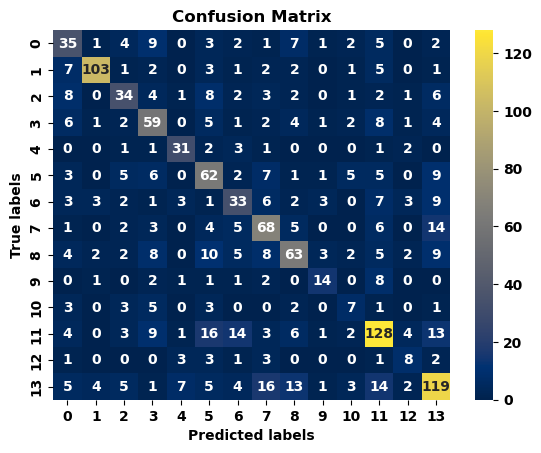

In [50]:
# Create a confusion matrix
cm = confusion_matrix(Y_test, Tree_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='g', cmap='cividis')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

plt.savefig("Tree_pigeons(ground)_confusion_matrix.png")
plt.show()

## 6. Random Forest Classifier

In [51]:
# Create an instance of the Random Forest model with 100 trees
RFC = RandomForestClassifier()

# Fit the Random Forest model to the training data
RFC.fit(X_train, Y_train)

# Predict the target values for the testing data
RFC_pred = RFC.predict(X_test)

#evaluate the performance of the classifier
RFC_acc = accuracy_score(Y_test, RFC_pred)
print("Random Forest Accuracy: {:.2f}".format(RFC_acc))

Random Forest Accuracy: 0.84


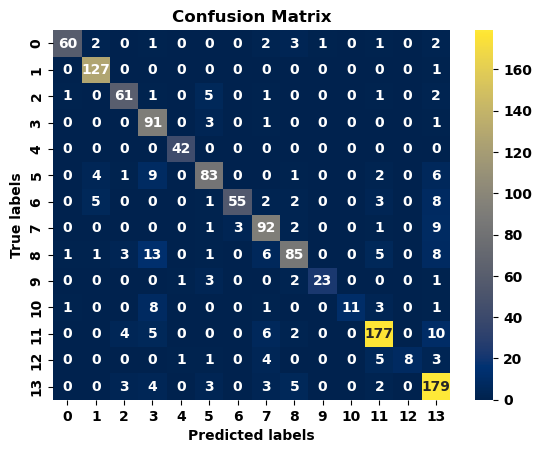

In [52]:
# Create a confusion matrix
cm = confusion_matrix(Y_test, RFC_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='g', cmap='cividis')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

plt.savefig("rfc_pigeons(ground)_confusion_matrix.png")
plt.show()

## 7. SVM model

In [55]:
# Create an instance of the SVM model
svm = SVC(kernel='linear', C=1)

# Fit the SVM model to the training data
svm.fit(X_train, Y_train)

# Predict the target values for the testing data
svm_pred = svm.predict(X_test)

#evaluate the performance of the classifier
svm_acc = accuracy_score(Y_test, svm_pred)
print("SVM Accuracy: {:.2f}".format(svm_acc))

SVM Accuracy: 0.72


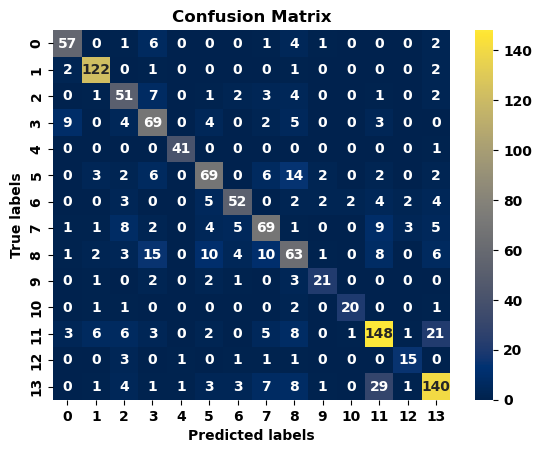

In [56]:
# Create a confusion matrix
cm = confusion_matrix(Y_test, svm_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='g', cmap='cividis')  
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

plt.savefig("svm_pigeons(ground)_confusion_matrix.png")
plt.show()

In [60]:
# Create a dictionary of the accuracy scores
results = {'Classifier': ['Largest prior', 'Decision Tree', 'KNN', 'Bagging', 'SVM', 'LDA', 'Random Forest'],
           'Accuracy': [accuracy, Tree_acc, KNN_acc, bagging_acc, svm_acc, LDA_acc, RFC_acc]}

# Create a Pandas dataframe from the dictionary
df_pigeons_ground_results = pd.DataFrame(results)

# Sort the dataframe by accuracy in descending order
df_pigeons_ground_results = df_pigeons_ground_results.sort_values(by='Accuracy', ascending=False)

# Print the dataframe
df_pigeons_ground_results

,Classifier,Accuracy
0,Largest prior,1.000000
6,Random Forest,0.839601
5,LDA,0.811972
2,KNN,0.803530
3,Bagging,0.730622
4,SVM,0.719110
1,Decision Tree,0.586339


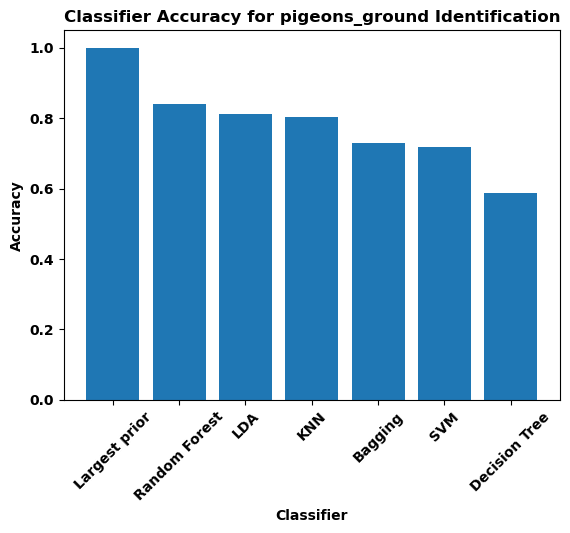

In [61]:
# Create a bar chart of the accuracy scores
plt.bar(df_pigeons_ground_results['Classifier'], df_pigeons_ground_results['Accuracy'])
plt.xticks(rotation=45)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy for pigeons_ground Identification')

plt.savefig("barchart showing pigeons_ground Classifier Accuracy.png")
plt.show()